# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Lernings-from-reading-Python-Data-Science-Handbook" data-toc-modified-id="Lernings-from-reading-Python-Data-Science-Handbook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lernings from reading <em>Python Data Science Handbook</em></a></div><div class="lev1 toc-item"><a href="#Numpy" data-toc-modified-id="Numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numpy</a></div><div class="lev2 toc-item"><a href="#Creating-your-own-histogram" data-toc-modified-id="Creating-your-own-histogram-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating your own histogram</a></div><div class="lev2 toc-item"><a href="#Sorting" data-toc-modified-id="Sorting-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sorting</a></div><div class="lev1 toc-item"><a href="#Pandas" data-toc-modified-id="Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pandas</a></div><div class="lev2 toc-item"><a href="#Pivot-Tables" data-toc-modified-id="Pivot-Tables-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pivot Tables</a></div><div class="lev2 toc-item"><a href="#hierarchical-Data-Structure" data-toc-modified-id="hierarchical-Data-Structure-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>hierarchical Data Structure</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/mikkelhartmannjensen/Documents/projects/mikmik19.github.com/notebooks/env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lernings-from-reading-Python-Data-Science-Handbook" data-toc-modified-id="Lernings-from-reading-Python-Data-Science-Handbook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lernings from reading <em>Python Data Science Handbook</em></a></span></li><li><span><a href="#Numpy" data-toc-modified-id="Numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numpy</a></span><ul class="toc-item"><li><span><a href="#Creating-your-own-histogram" data-toc-modified-id="Creating-your-own-histogram-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating your own histogram</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sorting</a></span></li></ul></li><li><span><a href="#Pandas" data-toc-modified-id="Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pandas</a></span><ul class="toc-item"><li><span><a href="#Pivot-Tables" data-toc-modified-id="Pivot-Tables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pivot Tables</a></span></li><li><span><a href="#hierarchical-Data-Structure" data-toc-modified-id="hierarchical-Data-Structure-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>hierarchical Data Structure</a></span></li></ul></li></ul></div>

# Lernings from reading _Python Data Science Handbook_
This notebook contains all the cool tricks I've learned from reading _Python Data Science Hanbook_ by Jake VanderPlas.

# Numpy
_Chapter 2_ of the book focuses on Numpy.

## Creating your own histogram
This example is found on page. 84 of the book. I like this example because it uses three numpy functions I did not know of. `zero_like`, `searchsorted`, and `add.at`.

In [2]:
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)

Initialize a ndarray with the same shape as bins and fill it with zeros.

In [3]:
counts = np.zeros_like(bins)

Find indices where each element of x should be inserted into bins to maintain ordering. Bins is already sorted.

In [4]:
idx = np.searchsorted(bins, x)

Add 1 to each indice of counts. Using add.at to to in-place addition.

In [5]:
np.add.at(counts, idx, 1)

Now we are ready to plot the histogram.

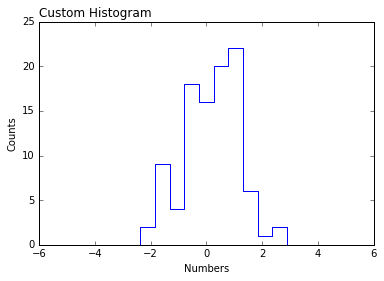

In [6]:
fig, ax = plt.subplots()
ax.plot(bins, counts, linestyle='steps')
ax.set_title('Custom Histogram', loc='left')
ax.set_ylabel('Counts')
ax.set_xlabel('Numbers');

## Sorting

On page 86 there is an implementation of selection sort. The algorithm loops over the array once. For each loop it finds the position of the minumum value in the rest of the array. It then swaps its position of the current element with the minimal value.   

I like this example because of the way it uses tuples to swap the values.

In [7]:
def selection_sort(x):
    for idx in range(len(x)):
        swap_idx = idx + np.argmin(x[idx:])
        (x[idx], x[swap_idx]) = (x[swap_idx], x[idx]) # This is what I like
    return x

x = np.random.randn(10)
selection_sort(x)

array([-1.61455054, -1.14810398, -0.41670911, -0.12191507,  0.05420115,
        0.33597684,  0.53556428,  0.90138072,  1.15100994,  1.33497664])

### Partial sorting with Partitioning
`partition` take two inputs, an array, $x$ and an index, $k$, structures that data so all the smallest $k$ values are places to the left of the index $k$, while all the values higher are placed to the right of the $k$th index. 

In [8]:
x = np.random.randn(10)
np.partition(x, 3)

array([-0.62194127, -1.17189872, -1.2433855 , -0.51559671, -0.48248466,
       -0.34854724,  0.46550409,  1.01229545, -0.1139379 ,  0.28204543])

There is also a method will will return the indices rather than the values -- similarly as `np.sort()` and `np.argsort()`.

In [9]:
idx = np.argpartition(x,3)
x[idx]

array([-0.62194127, -1.17189872, -1.2433855 , -0.51559671, -0.48248466,
       -0.34854724,  0.46550409,  1.01229545, -0.1139379 ,  0.28204543])

### Calculating k-nearest neighbours using partitioning and broadcasting

In the book he uses the partitioning together with fance indecing and broadcasting to calculate the $k$-nearest neighbours. The example nicely puts together many of the usefull tricks, so I will reproduce it here.

In [10]:
data = np.random.rand(10,2)
k = 3

In [11]:
squared_dist = np.sum( (data[:, np.newaxis, :] - data[np.newaxis, :, :])**2, axis=-1)

This is quite dense. We want to get a $10x10$ matrix that contains the distance from each point to every other pint (including the distance to itself). We achieve this by using the clever _broadcasting_ trick described on page 63-70.

Lets look at how the shape of the matrices are affected.

In [12]:
print(data[:, np.newaxis, :].shape)
print(data[np.newaxis, :, :].shape)
print((data[:, np.newaxis, :] - data[np.newaxis, :, :]).shape)

(10, 1, 2)
(1, 10, 2)
(10, 10, 2)


We want a $10x10$ matrix, so we need to sum along the last axis to get rid of it. This is why we are giving the `axis=-1` keyword.

In [13]:
print(squared_dist.shape)

(10, 10)


So we do indeed end up with at $10x10$ matrix. 

Now that we have gotten the squared distances using _broadcasting_, it is time to get the nearest neighbours using _partitionin_. 

In [14]:
neareast_neighbour = np.argpartition(squared_dist, k+1, axis=1)

We need to partition onthe $k+1$th index because the array also include the distance of each point to itself. We are partitioning along the columns axis.

Lets plot the points together with their nearest neighbours. First ill define come colours and linestyles that we will be using.

In [15]:
cols = [
    'black',
    'pink',
    'green',
    'blue',
    'cyan',
    'olive',
    'red',
    'magenta',
    'orange',
    'lightblue'
]
linestyles = ['-', '--', '-.']*4

Now we can loop over each point and draw the lines to the nearest neighbours.

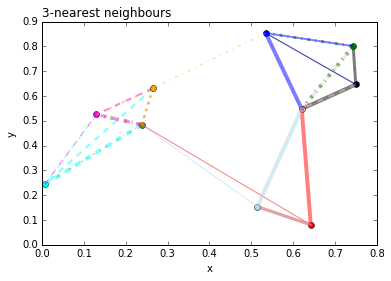

In [16]:
fig, ax = plt.subplots()
for i in range(data.shape[0]):
    ax.plot(data[i,0], data[i,1], 'o', color=cols[i], markeredgecolor='k')
    for linewidth, neighbour_i in enumerate(neareast_neighbour[i, :k+1]):
        ax.plot(*zip(data[neighbour_i], data[i]),
                color=cols[i],
                linestyle=linestyles[i],
                linewidth=(k-linewidth)+1,
                alpha=0.5)
        
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'{k}-nearest neighbours', loc='left');

Here I let the width of the line indicate the proximity of the points, so bolder means closer. I cycle through different line styles to make it easier to see the two-way nature of the connections.

The only thing thats note-worthy about the code snippet above is the use of `zip()`. Lets look at what it actually does.

In [17]:
for (a,b) in zip(data[neighbour_i], data[i]):
    print(a,b)

0.23825805437203507 0.5143013578820181
0.48410702505224834 0.15382100247135067


So given two points $(x_0, y_0)$ and $(x_1, y_1)$ it creates an array that contains $[x_0, x_1]$, $[y_0, y_1]$, so we can  draw a line between the pints. This makes sense after having gone trhough it.

But how about the `*`? If we leave it out we get an error message that states that matplotlib does not take generators as inputs.

The `*` tells the function that it should _unpack_ the values. It is used when given an unknown number of positional arguments to a function. We use that fact that `pyplot.plot()` supports positional arguments of the form:

`plt(x0, y0, ..., xn, yn)`.

When we unpack the zip this is what we are giving the function.

If this seems a bit obscure, we could have done the following instead:

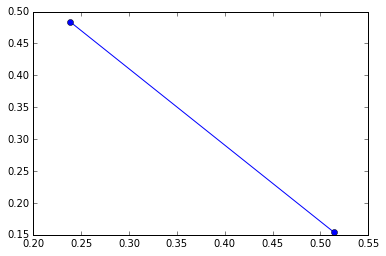

In [18]:
xs = [data[neighbour_i][0], data[i][0]]
ys = [data[neighbour_i][1], data[i][1]]
plt.plot(xs, ys)
plt.plot(xs, ys, 'ob');

It is more explicit, but also a sore to the eye.

# Pandas

## Pivot Tables

First we will load the  _Titanic_ dataset, as described on p. 170 of the book.

In [19]:
titanic = sns.load_dataset('titanic')

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Below we will calculate the mean survival rate across sex and class using the `groupby()` and `aggregate()` methods.

In [21]:
titanic\
    .groupby(['sex', 'class'])['survived']\
    .aggregate('mean')\
    .unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


The `unstack()` method restructures the output so every row and column has a name. The same thing can be achieved by using Pandas _Pivot Table Syntax_.

In [22]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## hierarchical Data Structure
I have a bunch of biometric data for a couple of patients and want to do some feature engineering.

In [23]:
def construct_patient_df(patient_id):
    ROWS=5
    dates = pd.datetime(2018, 2,2) + pd.to_timedelta(np.arange(ROWS) ,'D')
    hr = np.random.randn(ROWS,1)
    steps = np.random.randn(ROWS,1)
    
    columns = pd.MultiIndex.from_product([[patient_id], ['hr', 'steps']],
                                         names=['id', 'date'])
    
    return pd.DataFrame(
        np.hstack([hr, steps]),
        index=dates,
        columns=columns
    )

In [24]:
patient_df = construct_patient_df(0)
patient_df.head()

id                 0          
date              hr     steps
2018-02-02 -1.365795 -0.438801
2018-02-03  0.059381 -0.800157
2018-02-04  1.029080  0.815824
2018-02-05 -0.613243 -1.817047
2018-02-06  0.090189  1.013127

Lets string together a couple of dataframes.

In [25]:
p_dfs = [construct_patient_df(i) for i in range(5)]
df = pd.concat(p_dfs, axis=1)

In [26]:
df.head()

id                 0                   1                   2            \
date              hr     steps        hr     steps        hr     steps   
2018-02-02  0.243471  1.287713  0.537295  1.246983  0.208877 -0.624711   
2018-02-03 -0.454474 -0.284840 -0.285043  0.003300  1.366810 -0.920252   
2018-02-04 -0.103759  0.626279  1.120041  0.764704 -1.815845  0.341394   
2018-02-05  0.027859 -0.482866  0.130650 -2.424558 -2.227257  0.105808   
2018-02-06  0.201165 -3.052490  0.205693 -0.035978  0.307773 -0.040987   

id                 3                   4            
date              hr     steps        hr     steps  
2018-02-02  0.139606 -1.279942 -0.504987 -0.824966  
2018-02-03 -0.871761  0.531250  0.118179  0.420201  
2018-02-04  1.031713 -0.227029 -0.672428 -0.621916  
2018-02-05 -1.076730  0.472057  1.153251  0.524997  
2018-02-06  0.328939  1.194531  1.187901 -0.780683

It is not particularly nice to look at, but this hierachial structure is extremely usefull when indexing and slicing the data. Lets look at some examples.

If we only want data from a single patient, we can use the standard notation to get it.

In [27]:
df[0]

date,hr,steps
2018-02-02,0.243471,1.287713
2018-02-03,-0.454474,-0.284840
2018-02-04,-0.103759,0.626279
2018-02-05,0.027859,-0.482866
2018-02-06,0.201165,-3.052490


We can pass more _keys_ if we are interested in a more specific view.

In [28]:
df[0, 'hr']

2018-02-02    0.243471
2018-02-03   -0.454474
2018-02-04   -0.103759
2018-02-05    0.027859
2018-02-06    0.201165
Freq: D, Name: (0, hr), dtype: float64

Since the index is a _dateteime_ we can easily access a subset of the data by slicing.

In [29]:
df[0, 'hr']['2018-02-03':'2018-02-05']

2018-02-03   -0.454474
2018-02-04   -0.103759
2018-02-05    0.027859
Freq: D, Name: (0, hr), dtype: float64

We can also easily create new columns by using the familiar notation.

In [30]:
df[0, 'max_hr'] = df[0,'hr'].max()
df[0]

date,hr,steps,max_hr
2018-02-02,0.243471,1.287713,0.243471
2018-02-03,-0.454474,-0.284840,0.243471
2018-02-04,-0.103759,0.626279,0.243471
2018-02-05,0.027859,-0.482866,0.243471
2018-02-06,0.201165,-3.052490,0.243471


I want to be able to efficiently loop over the dataframe and calculate some complicated features. E.g. what is the average heart rate over the last three days. I wan't this to be added as a column to the dataframe.

In [31]:
%%timeit
# I have to initialize the columns here, so 
# I can access them later. This feels wrong, 
# so i guess my approach is wrong.
# I should fix this.
df[0, 'test_loop'] = 0
for date in df[0].index:
    lookback = date - pd.to_timedelta(2 ,'D')
    df[0, 'test_loop'].loc[date] = len(df[0, 'hr'].loc[lookback:date])

/Users/mikkelhartmannjensen/Documents/projects/mikmik19.github.com/notebooks/env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


264 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Here i am using the `.loc[index]` syntax get the data at the position of the `index`.

In [32]:
df[0]

date,hr,steps,max_hr,test_loop
2018-02-02,0.243471,1.287713,0.243471,1
2018-02-03,-0.454474,-0.284840,0.243471,2
2018-02-04,-0.103759,0.626279,0.243471,3
2018-02-05,0.027859,-0.482866,0.243471,3
2018-02-06,0.201165,-3.052490,0.243471,3


Now we wan't to achive the same using the `apply()` method.

In [33]:
def lookback(row, df):
    date = row.name
    lookback = date - pd.to_timedelta(2 ,'D')
    return len(df.loc[lookback:date])
    
%timeit df[0, 'test_apply'] = df[0].apply(lookback, axis=1, args=(df[0],))

8.03 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
df[0]

date,hr,steps,max_hr,test_loop,test_apply
2018-02-02,0.243471,1.287713,0.243471,1,1
2018-02-03,-0.454474,-0.284840,0.243471,2,2
2018-02-04,-0.103759,0.626279,0.243471,3,3
2018-02-05,0.027859,-0.482866,0.243471,3,3
2018-02-06,0.201165,-3.052490,0.243471,3,3


So the `apply()` is faster by about a factor 70. Not bad!